# MATH 4340 / COSC 4340: Numerical Methods for Differential Equations
# Notebook 3: ODE Solvers for Systems of Equations

### Professor: Dane Taylor
### Date: Spring 2024


In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## 1. SIS Epidemic Model Example


In [10]:
def simulate_SIS(gamma,# healing rate
                 beta,# transmission rate
                 ti,# time mesh
                 y0):# inital condition
    
    y = zeros((len(ti),2))# row i contains y_i
    y[0] = y0# initial condition

    for t in range(0,N):
        S = y[t,0]
        I = y[t,1]

        # Forward Euler
        f1 = -beta*I*S + gamma*I #dS/dt
        f2 = beta*I*S - gamma*I #dI/dt
        S = S + h*f1
        I = I + h*f2
        y[t+1] = [S,I]
        
    return ti,y

def plot_SIS(ti,y,ax):
    ax.plot(ti,y[:,0])
    ax.plot(ti,y[:,1])
    ax.legend(['Susceptible, S','Infected, I'])
    ax.set_xlabel('time, t')
    ax.set_ylabel('level of infection')

### Study two different infection rates

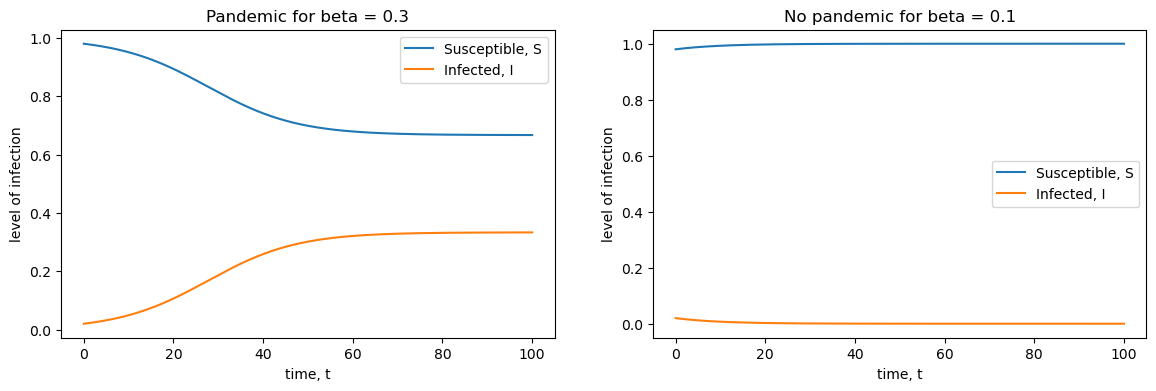

In [27]:
gamma = .2 # healing rate

N=1000
T=100
ti = linspace(0,T,N+1)# time mesh

y0 = [.98,.02]# initial condition = 90% susceptible, 10% infected

fig, ax = plt.subplots(1,2,figsize=(14,4))

beta = .3 # large transmission rate
ti,y = simulate_SIS(gamma,beta,ti,y0)
plot_SIS(ti,y,ax[0])
ax[0].set_title('Pandemic for beta = 0.3')

beta = .1 # small transmission rate
ti,y2 = simulate_SIS(gamma,beta,ti,y0)
plot_SIS(ti,y2,ax[1])
ax[1].set_title('No pandemic for beta = 0.1');

For $\beta>\gamma$, about 30% of the population remains infected 

For $\beta<\gamma$, the infection decays and vanishes

Social distancing and masks decrease transmission rate

## 2. Example of a 2nd-order differential equation


In [29]:
A = np.array([[0,1,0],
              [0,0,1],
              [1,2,1]])

y0 = np.array([1,1,0])

t0,T,N = 0,1,10
h = (T-t0)/N
ti_s = linspace(t0,T,N+1)

In [53]:
np.linalg.norm(A,'fro')

2.8284271247461903

In [30]:
y_values = np.zeros((N+1,3))
y_values[0] = y0
for i in range(N):
    y_values[i+1] = y_values[i] + h *np.dot(A,y_values[i])

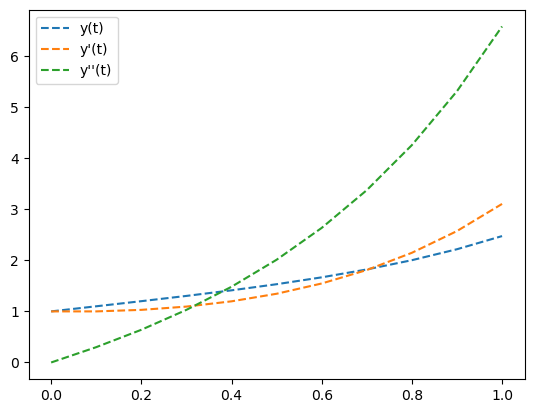

In [31]:
plot(ti_s,y_values,'--');
#plot(ti_s,y_values[:,0],linewidth=3);
legend(['y(t)','y\'(t)','y\'\'(t)']);

In [58]:
y_values[:,0]

array([1.        , 1.1       , 1.2       , 1.303     , 1.4124    ,
       1.5321    , 1.666621  , 1.8212515 , 2.00222497, 2.21693494,
       2.47419577])

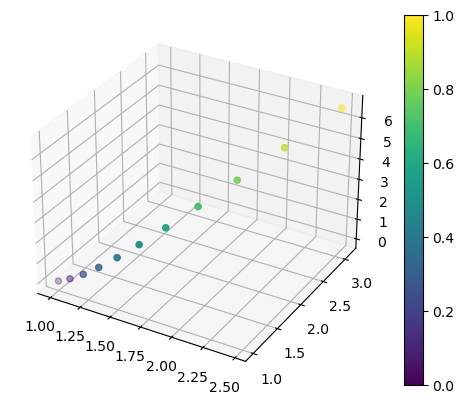

In [60]:
# how to make 3D plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#ax.scatter(y_values[:,0],y_values[:,1],y_values[:,2]);
#ax.scatter(y_values.T[0],y_values.T[1],y_values.T[2]);
curve= ax.scatter(y_values.T[0],y_values.T[1],y_values.T[2],c=ti_s);
plt.colorbar(curve)

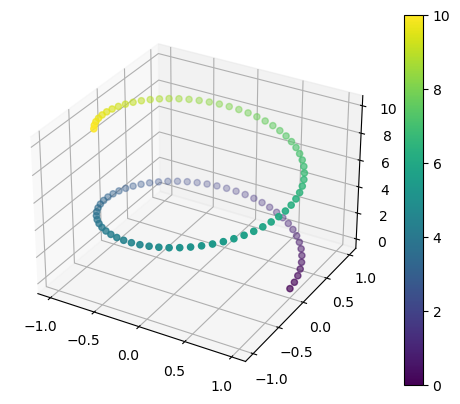

In [62]:
# how to make 3D plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

z = linspace(0,10,100)
x = cos(z)
y = sin(z)
z = linspace(0,10,100)
#ax.scatter(x,y,z);
curve = ax.scatter(x,y,z,c=z);
plt.colorbar(curve)